In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [77]:
df=pd.read_csv('wines_SPA.csv')
df

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0


In [78]:
df=df.drop(["country"],axis=1)
df

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0


In [79]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_cols = ["winery", "wine", "region", "price", "type"]
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
    df

In [80]:
df["acidity"]=df["acidity"].fillna(df["acidity"].sum())

df["year"]=df["year"].fillna(df["year"][1])

In [81]:
df.dtypes

,0
winery,int64
wine,int64
year,object
rating,float64
num_reviews,int64
region,int64
price,int64
type,int64
body,float64
acidity,float64


In [82]:
low_price=df["price"].quantile(0.05)
high_price=df["price"].quantile(0.95)
df=df[(df["price"]>=low_price)&(df["price"]<=high_price)]
df
from scipy.stats import zscore

df['z_score'] = zscore(df['price'])
df = df[df['z_score'].abs() < 3]
df = df.drop(columns=['z_score'])


<ipython-input-82-6df1e91682cf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['z_score'] = zscore(df['price'])


In [83]:
low_price=df["price"].quantile(0.05)
high_price=df["price"].quantile(0.95)
df=df[(df["price"]>=low_price)&(df["price"]<=high_price)]
df

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
69,353,241,2015,4.7,543,57,738,11,5.0,3.0
87,380,411,2015,4.7,256,69,670,19,5.0,3.0
89,91,750,2017,4.7,251,15,690,18,4.0,2.0
120,217,758,2016,4.7,92,10,485,21,NaN,18655.0
148,388,625,2011,4.7,35,17,682,2,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...
7495,159,619,2016,4.2,392,59,126,12,4.0,3.0
7496,158,440,2018,4.2,390,53,73,9,4.0,3.0
7497,334,302,2017,4.2,390,24,189,10,4.0,3.0
7498,316,342,2011,4.2,389,57,676,11,5.0,3.0


In [84]:
low_wine=df["wine"].quantile(0.5)
high_wine=df["wine"].quantile(0.97)
df=df[(df["wine"]>=low_wine)&(df["wine"]<=high_wine)]

In [87]:
df = df.dropna()
df = df.fillna(0)
print(df.dtypes)

winery           int64
wine             int64
year            object
rating         float64
num_reviews      int64
region           int64
price            int64
type             int64
body           float64
acidity        float64
dtype: object


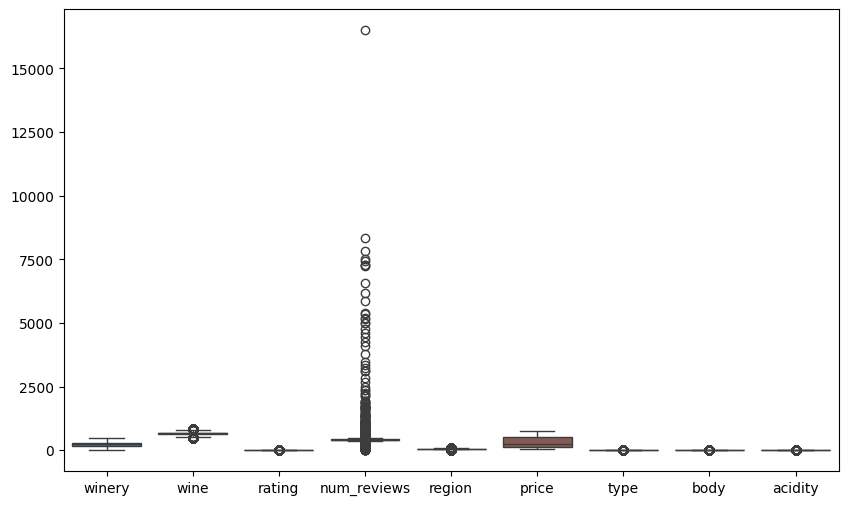

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.show()

In [89]:
high_rew=df["num_reviews"].quantile(0.92)
low_rew=df["num_reviews"].quantile(0.5)
df=df[(df["num_reviews"]<=high_rew)&(df["num_reviews"]>=low_rew)]
df


,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
1269,219,766,2016,4.3,419,57,266,11,5.0,3.0
1999,390,662,2017,4.2,421,59,272,13,3.0,3.0
2025,271,619,2015,4.2,420,59,88,12,4.0,3.0
2026,200,690,2017,4.2,420,2,105,10,4.0,3.0
2027,152,675,2011,4.2,420,21,184,10,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...
7477,200,690,2017,4.2,420,2,105,10,4.0,3.0
7478,152,675,2011,4.2,420,21,184,10,4.0,3.0
7480,250,669,2004,4.2,417,59,503,12,4.0,3.0
7482,292,639,2015,4.2,414,54,75,0,3.0,3.0


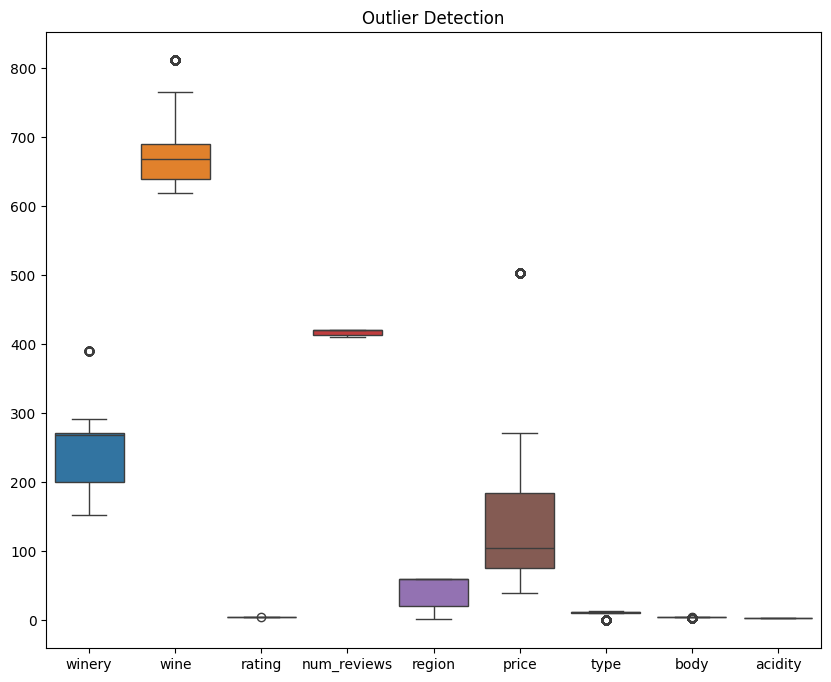

In [90]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df)
plt.title("Outlier Detection")
plt.show()

In [91]:
df.replace('N.V.',np.nan,inplace=True)
df.fillna(0,inplace=True)

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=df.drop(['price'],axis=1)
X = scaler.fit_transform(X)
y=df["price"]
from sklearn.decomposition import PCA
df
df = df.drop(columns=['winery', 'wine', 'region', 'type'])



In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test,y_test)


1.0

In [94]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print("Ridge R² Score:", ridge.score(X_test, y_test))

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)
y_pred=lasso.predict(X)
y_pred[:3]


Ridge R² Score: 0.9999837615312089


array([263.19528448, 270.16592823,  88.83422411])

In [95]:
y_test[:3]

,price
5079,503
7057,75
6176,88


In [98]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
model = LinearRegression()
kf = KFold(n_splits=3, shuffle=True, random_state=42)
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)

cross_val_score(model, X, y, cv=kf, scoring='r2')




array([0.99997732, 0.99250884, 0.99997976])

In [102]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
cross_val_score(model,X, y, cv=kf, scoring='r2')


array([0.99997732, 0.99250884, 0.99997976])

In [103]:
model = LinearRegression(fit_intercept=True, n_jobs=-1, positive=True)
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
cross_val_score(model,X, y, cv=kf, scoring='r2')


array([0.22022005, 0.20024516, 0.24383576])

In [113]:
model = LinearRegression(
    fit_intercept=True,
    copy_X=False,
    n_jobs=-1,
    positive=False
)
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
cross_val_score(model,X, y, cv=kf, scoring='r2')



array([1.        , 0.99250888, 1.        ])

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [121]:
y_true_all = []
y_pred_all = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)
final_cm = confusion_matrix(y_true_all, y_pred_all)
model.score(X_test,y_test)


0.865

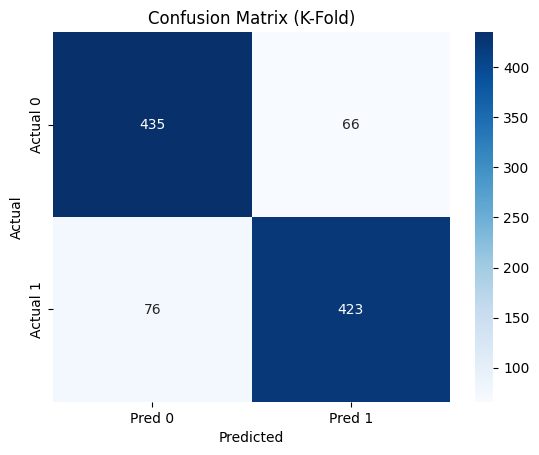

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(final_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (K-Fold)")
plt.show()
